In [1]:
import pandas as pd
import plotly.express as px


In [2]:
df = pd.read_csv("Play Store Data.csv")

In [3]:
paid_apps = df[df["Price"].str.contains(r"\$", na=False)].copy()

In [4]:
paid_apps["Price"] = paid_apps["Price"].str.replace("$", "").astype(float)

In [5]:
paid_apps["Min Installs"] = paid_apps["Installs"].str.replace("[+,]", "", regex=True).astype(float)


In [6]:
paid_apps["Revenue"] = paid_apps["Price"] * paid_apps["Min Installs"]

In [7]:
fig = px.scatter(
    paid_apps, 
    x="Min Installs", 
    y="Revenue", 
    color="Category",
    title="Revenue vs. Installs for Paid Apps",
    labels={"Min Installs": "Number of Installs", "Revenue": "Estimated Revenue"},
    trendline="ols",
    hover_data=["App"]
)

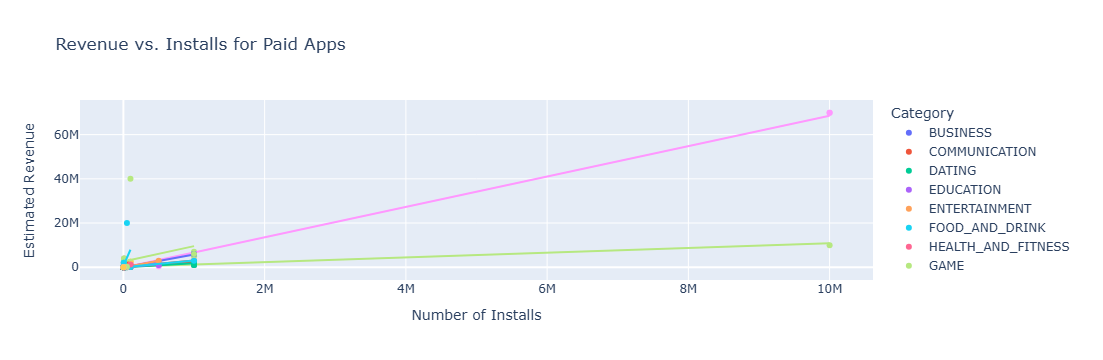

In [9]:
fig.show()
